In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [45]:
df = pd.read_csv("Data\insurance_logis.csv")

In [46]:
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [47]:
df.describe()


,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

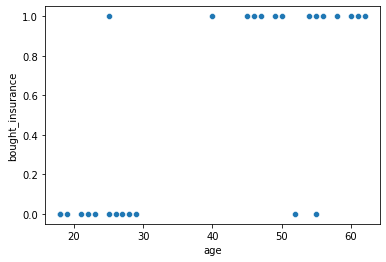

In [49]:
sns.scatterplot(x=df['age'],y=df['bought_insurance'])

Text(0, 0.5, 'target class')

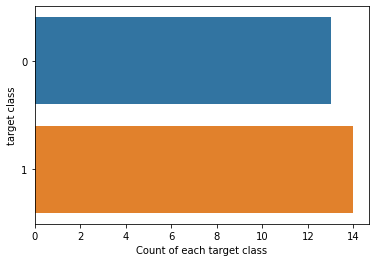

In [50]:
sns.countplot(data=df,y=df['bought_insurance'])
plt.xlabel('Count of each target class')
plt.ylabel('target class')

In [51]:
#above show this is not a case of class imbalance

In [52]:
df.count()

age                 27
bought_insurance    27
dtype: int64

In [53]:
df.groupby('bought_insurance').count()

,age
bought_insurance,
0,13
1,14


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bought_insurance'}>]], dtype=object)

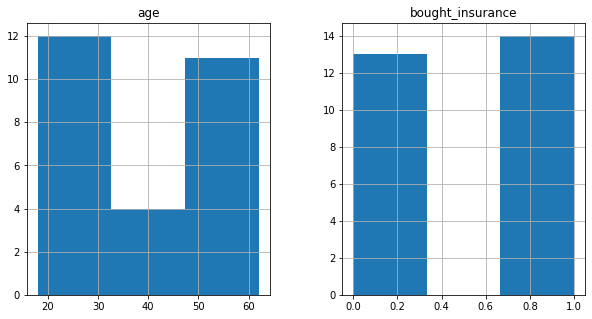

In [54]:
df.hist(bins=3,figsize=(10,5))

<function matplotlib.pyplot.show(close=None, block=None)>

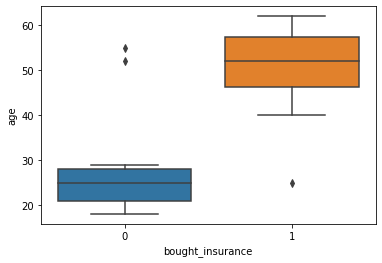

In [55]:
sns.boxplot(y=df['age'],x=df['bought_insurance'])
plt.show


In [56]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df['bought_insurance'],test_size=0.33,random_state=0)

In [57]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_predicted= lr.predict(X_test)
y_predictedProb=lr.predict_proba(X_test)
type(y_predicted)

numpy.ndarray

In [59]:
type(X_train)

pandas.core.frame.DataFrame

In [81]:
y_predicted


array([1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [61]:
type(y_predictedProb)

numpy.ndarray

In [82]:
pd.Series(y_predicted)

0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    0
8    0
dtype: int64

In [83]:
y_test

2     1
24    1
14    1
17    1
5     1
11    0
23    1
13    0
19    0
Name: bought_insurance, dtype: int64

In [72]:
y_predicted

array([1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [80]:
lr.score(X_test,y_test)

1.0

In [85]:
#getting confussion matrix
from sklearn.metrics import confusion_matrix

actual = y_test
predictied = y_predicted
cf= confusion_matrix(actual,predictied)
print(cf)

[[3 0]
 [0 6]]


In [88]:
from sklearn.metrics import classification_report
precision = classification_report(actual,predictied)
print(precision)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

